In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, Conv1D, MaxPooling1D
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
np.random.seed(0)
from nltk import word_tokenize
from gensim.models import word2vec
import talos as ta
from keras.layers import Dropout
from talos.model.early_stopper import early_stopper
from talos.model.normalizers import lr_normalizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
%matplotlib inline



In [3]:
df = pd.read_csv('updated_target_merged_data.csv')

df.head()

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,pc_1,pc_2,pc_3,pc_4,...,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,signal_y
0,2017-09-29,171,105,1,0.366667,assuming acceleration of to but in a comfortab...,-0.031750,-0.028862,-0.030268,-0.018790,...,-0.034915,-0.030453,0.009013,-0.004715,-0.074266,-0.084025,0.019334,-0.004746,0.025779,down
1,2017-09-29,77,113,1,0.200000,is capable of transporting satellite to orbit ...,-0.059331,-0.099826,-0.154760,-0.040333,...,-0.015897,0.009704,-0.011633,-0.016697,-0.033227,0.000195,0.011908,-0.017864,-0.001426,down
2,2017-09-29,171,6,0,0.000000,yup,-0.002330,0.033960,0.069607,-0.014126,...,0.012970,-0.008978,-0.013865,0.046525,-0.007867,0.041954,-0.034317,-0.085269,-0.029201,down
3,2017-09-29,171,7,0,0.000000,part,-0.005050,0.024122,0.043361,-0.001799,...,-0.000544,-0.003106,-0.009162,-0.007540,0.008748,0.016646,-0.003052,-0.056231,-0.018816,down
4,2017-09-29,171,96,1,0.650000,fly to most place on earth in under min and an...,-0.031167,-0.027728,-0.012339,-0.039902,...,-0.000036,-0.000197,-0.007578,0.083160,-0.010546,-0.022204,-0.059491,0.048438,0.023978,down


In [4]:
df_pca = pd.read_csv('pca_updated_data.csv')

In [5]:
df_1 = df[['Date', 'retweet_from', 'tweet_length', 'encoded_sentiment', 'polarity', 'tweet', 'signal_y']]


In [6]:
df_2 = pd.concat([df_1, df_pca], axis=1)

In [7]:
df_2 = df_2.drop(columns=['Unnamed: 0'])

In [8]:
df_2

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,signal_y,0,1,2,...,790,791,792,793,794,795,796,797,798,799
0,2017-09-29,171,105,1,0.366667,assuming acceleration of to but in a comfortab...,down,-0.031750,-0.028860,-0.030273,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,2017-09-29,77,113,1,0.200000,is capable of transporting satellite to orbit ...,down,-0.059331,-0.099827,-0.154757,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,2017-09-29,171,6,0,0.000000,yup,down,-0.002330,0.033969,0.069578,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,2017-09-29,171,7,0,0.000000,part,down,-0.005050,0.024121,0.043358,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,2017-09-29,171,96,1,0.650000,fly to most place on earth in under min and an...,down,-0.031167,-0.027728,-0.012323,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714
5,2017-09-29,77,80,1,0.125000,supporting the creation of a permanent self su...,down,-0.022098,-0.021098,-0.019928,...,-0.019035,0.005167,0.007361,-0.014930,0.015815,0.012878,-0.103590,-0.044795,0.004917,0.027215
6,2017-09-29,171,57,-1,-0.166667,will take you anywhere on earth in than min,down,-0.030864,-0.014705,0.007456,...,-0.004858,-0.006783,-0.000320,-0.004073,-0.000498,-0.004615,-0.002140,-0.008353,0.013393,0.000666
7,2017-09-29,171,84,0,0.000000,mar city opposite of earth dawn and dusk sky a...,down,-0.024694,-0.022623,0.003114,...,-0.000047,-0.009445,-0.038989,0.006886,-0.007342,-0.004931,-0.013092,-0.022566,0.014179,0.017914
8,2017-09-29,171,16,-1,-0.800000,moon base alpha,down,-0.003928,0.022689,0.046858,...,-0.011843,0.001828,-0.001066,0.013197,0.000017,0.010389,-0.007440,0.005900,-0.016406,0.009333
9,2017-09-29,171,60,1,0.357143,will be something really special at talk,down,-0.019188,-0.006818,0.030090,...,0.003810,-0.013398,0.014402,-0.009557,-0.000274,-0.001698,0.001279,-0.028755,0.008977,0.004044


## Scale the data

we are scaling retweets_from and tweet_length

In [9]:
scaler = StandardScaler()

In [10]:
df_2[['retweet_from', 'tweet_length']] = scaler.fit_transform(df[['retweet_from', 'tweet_length']])



In [11]:
df_2.head()

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,signal_y,0,1,2,...,790,791,792,793,794,795,796,797,798,799
0,2017-09-29,0.375794,0.748184,1,0.366667,assuming acceleration of to but in a comfortab...,down,-0.031750,-0.028860,-0.030273,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,2017-09-29,-2.297408,0.946045,1,0.200000,is capable of transporting satellite to orbit ...,down,-0.059331,-0.099827,-0.154757,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,2017-09-29,0.375794,-1.700349,0,0.000000,yup,down,-0.002330,0.033969,0.069578,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,2017-09-29,0.375794,-1.675616,0,0.000000,part,down,-0.005050,0.024121,0.043358,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,2017-09-29,0.375794,0.525590,1,0.650000,fly to most place on earth in under min and an...,down,-0.031167,-0.027728,-0.012323,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714


In [12]:
df_2.tweet = df.tweet.astype(str)

## Check the class balance of our target classes

In [13]:
target = df.signal_y

In [14]:
target.head()

0    down
1    down
2    down
3    down
4    down
Name: signal_y, dtype: object

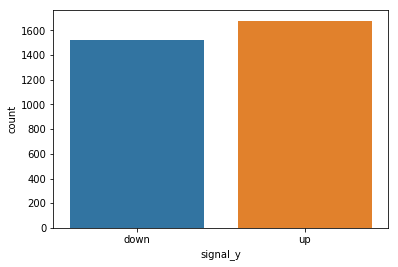

In [15]:
sns.countplot(df['signal_y'])

# Exploratory Data Analysis

In [16]:
df_graph = df_2[['tweet']]

df_graph['tweet_length'] = df_2['tweet'].apply(len)

df_graph['encoded_sentiment'] = df_2['encoded_sentiment']

df_graph['target'] = target

df_graph.head()

,tweet,tweet_length,encoded_sentiment,target
0,assuming acceleration of to but in a comfortab...,83,1,down
1,is capable of transporting satellite to orbit ...,94,1,down
2,yup,3,0,down
3,part,4,0,down
4,fly to most place on earth in under min and an...,85,1,down


In [17]:
df_graph['tweet_length'].describe()

count    3205.000000
mean       57.876443
std        33.344703
min         1.000000
25%        30.000000
50%        59.000000
75%        85.000000
max       136.000000
Name: tweet_length, dtype: float64

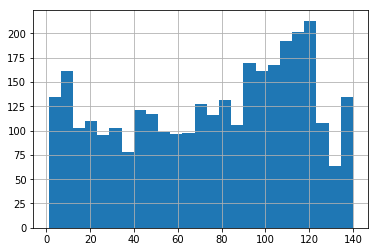

In [18]:
df['tweet_length'].hist(bins = 25)

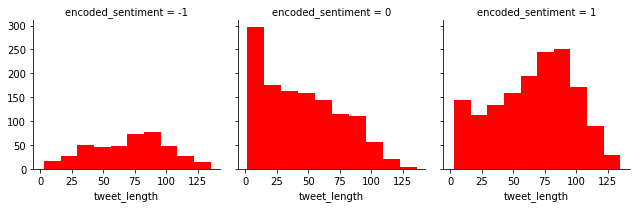

In [19]:
sentiment_graph = sns.FacetGrid(df_graph,col='encoded_sentiment')
sentiment_graph.map(plt.hist,'tweet_length', color='r')



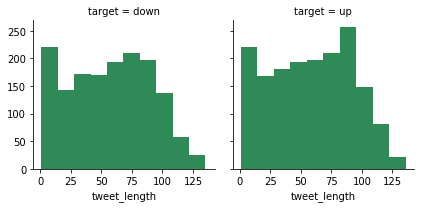

In [20]:
target_graph = sns.FacetGrid(df_graph,col='target')
target_graph.map(plt.hist,'tweet_length', color='seagreen')

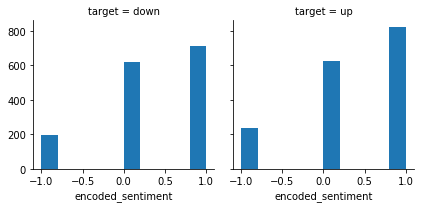

In [21]:
target_sentiment_graph = sns.FacetGrid(df_graph,col='target')
target_sentiment_graph.map(plt.hist,'encoded_sentiment')

# ANN Model for non tweet features

Make the dataframe for not tweet features, which include the tf-idf of the tweets.


In [22]:
y = pd.get_dummies(target).values

In [23]:
print(type(y))
y[:4]

<class 'numpy.ndarray'>


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [24]:
df_no_tweet = df_2.drop(['signal_y', 'tweet', 'Date'], axis=1)

In [25]:
df_no_tweet.head()

,retweet_from,tweet_length,encoded_sentiment,polarity,0,1,2,3,4,5,...,790,791,792,793,794,795,796,797,798,799
0,0.375794,0.748184,1,0.366667,-0.031750,-0.028860,-0.030273,-0.018769,-0.060676,0.057752,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,-2.297408,0.946045,1,0.200000,-0.059331,-0.099827,-0.154757,-0.040344,0.072303,0.209183,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,0.375794,-1.700349,0,0.000000,-0.002330,0.033969,0.069578,-0.014138,-0.037713,-0.071401,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,0.375794,-1.675616,0,0.000000,-0.005050,0.024121,0.043358,-0.001800,-0.016294,-0.051990,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,0.375794,0.525590,1,0.650000,-0.031167,-0.027728,-0.012323,-0.039920,-0.070452,0.019524,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714


In [26]:
# these are the features for the no_tweet ANN model
X = df_no_tweet.drop(columns=['encoded_sentiment']).as_matrix()

In [27]:
X[0]

array([ 3.75793919e-01,  7.48184035e-01,  3.66666667e-01, -3.17503623e-02,
       -2.88596117e-02, -3.02734905e-02, -1.87692485e-02, -6.06755412e-02,
        5.77523566e-02, -1.24476225e-01,  1.16653635e-01,  5.91170817e-02,
       -2.97008009e-02, -4.78538790e-02,  7.31022161e-02,  3.97427676e-02,
        2.94557512e-02, -5.14425781e-02,  1.73011505e-02,  1.47044217e-02,
       -3.64342311e-02,  9.60998918e-03, -3.43125693e-02,  1.57833522e-03,
        8.37099108e-03,  1.23539684e-02,  1.64156431e-02,  3.06772017e-02,
       -6.49284839e-04,  9.71982350e-03, -5.50731133e-02, -1.13178701e-02,
       -2.01777779e-02,  4.33702399e-02,  1.80898678e-02,  1.13444648e-02,
       -3.74634668e-02, -1.27220095e-01, -2.26284430e-02,  2.94634196e-03,
       -8.20366398e-02,  1.46922426e-02,  5.41828824e-02, -6.26004630e-02,
       -4.51437589e-02,  1.23467761e-01, -1.15357483e-02,  2.33041975e-02,
        4.17648570e-02,  4.62432608e-02, -3.77339721e-02,  1.64745731e-02,
       -5.54630947e-03, -

In [28]:
X.shape

(3205, 803)

In [29]:
X

array([[ 3.75793919e-01,  7.48184035e-01,  3.66666667e-01, ...,
        -5.89298127e-03,  2.02159374e-02, -2.44296936e-02],
       [-2.29740768e+00,  9.46045275e-01,  2.00000000e-01, ...,
         1.91110158e-02, -1.19081575e-02,  3.86021435e-04],
       [ 3.75793919e-01, -1.70034881e+00,  0.00000000e+00, ...,
        -2.58264620e-03, -1.09961019e-03,  6.27378001e-04],
       ...,
       [ 3.75793919e-01,  1.51489634e+00,  0.00000000e+00, ...,
         1.65888690e-03, -1.63609806e-02, -5.67280705e-03],
       [ 3.75793919e-01,  9.21312620e-01,  4.00000000e-01, ...,
         4.86410501e-04,  1.16638269e-02, -2.17394909e-02],
       [-3.29274870e+00, -4.63716060e-01,  0.00000000e+00, ...,
         2.96719122e-02, -6.37942781e-03,  2.21324532e-02]])

In [30]:
# this is check the target for the Neural Network
print(type(y))

<class 'numpy.ndarray'>


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [34]:
classifier = Sequential()
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'tanh'))
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'tanh'))
classifier.add(Dense(units = 2, kernel_initializer='uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
c = classifier.fit(X_train, y_train, batch_size = 10, epochs = 4, validation_split=0.1)


Train on 2307 samples, validate on 257 samples
Epoch 1/4
2307/2307 [==============================] - 1s 248us/step - loss: 0.6929 - acc: 0.5178 - val_loss: 0.6893 - val_acc: 0.5720
Epoch 2/4
2307/2307 [==============================] - 0s 129us/step - loss: 0.6787 - acc: 0.5581 - val_loss: 0.6988 - val_acc: 0.5447
Epoch 3/4
2307/2307 [==============================] - 0s 126us/step - loss: 0.5964 - acc: 0.6842 - val_loss: 0.7565 - val_acc: 0.5331
Epoch 4/4
2307/2307 [==============================] - 0s 120us/step - loss: 0.5511 - acc: 0.7215 - val_loss: 0.7974 - val_acc: 0.5447


In [35]:
score_no_tweet, acc_no_tweet = classifier.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.3f" % (score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (acc_no_tweet))

score_train_no_tweet, acc_train_no_tweet = classifier.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.3f" % (score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (acc_train_no_tweet))

score for the test data no tweet model: 0.826
acc for the test data  no tweet model: 0.4992200
score for the training data no tweet model: 0.531
acc for the training data no tweet model: 0.7377145


The neural network for the non-tweet data has a 66% accuracy rate.

In [36]:
def plot_train_val(model, label):
    plt.plot(model.history[label]) 
    plt.plot(model.history['val_' +label])
    plt.title('model '+label)
    plt.ylabel(label)
    plt.xlabel('epoch')
    plt.gca().legend(('train','val'))
    return plt.show()

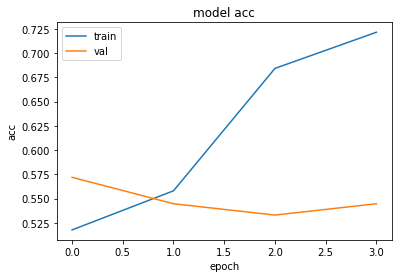

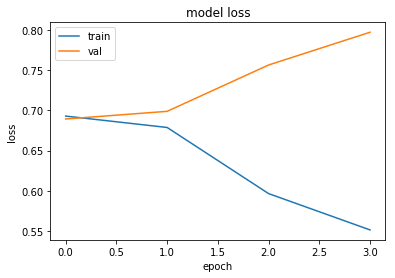

(None, None)

In [37]:
plot_train_val(c, 'acc'), plot_train_val(c, 'loss')

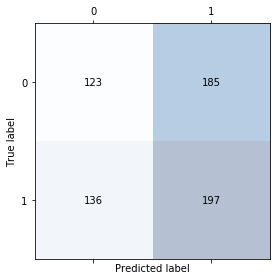

In [38]:
y_pred_test_classifier =  classifier.predict_classes(X_test, batch_size=20, verbose=0)
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test_classifier)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# ANN Model with tweets included

First, tokenize the tweets to feed into the model.

In [39]:
# set the tweet column to a string to account of data type errors
df_2.tweet = df_2.tweet.astype(str)

In [40]:
tokenizer = text.Tokenizer(num_words=15000)
tokenizer.fit_on_texts(list(df_2.tweet))
list_tokenized_tweets = tokenizer.texts_to_sequences(df_2.tweet)
X_t = sequence.pad_sequences(list_tokenized_tweets) 


In [41]:
print(type(X_t))
print(X_t.shape)
X_t[:3]

<class 'numpy.ndarray'>
(3205, 28)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1328,  711,    4,    2,   16,    6,    3, 1633, 1329,
          12,  351,   36,    3, 2220,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
         712,    4, 1634,  156,    2,  151,  394,    9,  461,    2,    1,
           9,  127,    2,    1,  276,   47],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  505]], dtype=int32)

In [42]:
print(type(X))
print(X.shape)
X[:1]

<class 'numpy.ndarray'>
(3205, 803)


array([[ 3.75793919e-01,  7.48184035e-01,  3.66666667e-01,
        -3.17503623e-02, -2.88596117e-02, -3.02734905e-02,
        -1.87692485e-02, -6.06755412e-02,  5.77523566e-02,
        -1.24476225e-01,  1.16653635e-01,  5.91170817e-02,
        -2.97008009e-02, -4.78538790e-02,  7.31022161e-02,
         3.97427676e-02,  2.94557512e-02, -5.14425781e-02,
         1.73011505e-02,  1.47044217e-02, -3.64342311e-02,
         9.60998918e-03, -3.43125693e-02,  1.57833522e-03,
         8.37099108e-03,  1.23539684e-02,  1.64156431e-02,
         3.06772017e-02, -6.49284839e-04,  9.71982350e-03,
        -5.50731133e-02, -1.13178701e-02, -2.01777779e-02,
         4.33702399e-02,  1.80898678e-02,  1.13444648e-02,
        -3.74634668e-02, -1.27220095e-01, -2.26284430e-02,
         2.94634196e-03, -8.20366398e-02,  1.46922426e-02,
         5.41828824e-02, -6.26004630e-02, -4.51437589e-02,
         1.23467761e-01, -1.15357483e-02,  2.33041975e-02,
         4.17648570e-02,  4.62432608e-02, -3.77339721e-0

In [43]:
X_try = np.append(X_t, X, axis=1)

In [44]:
X_try.shape

(3205, 831)

In [45]:
# use X_try because it combines tweets vectors and pca vectors
X_try[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.32800000e+03,  7.11000000e+02,  4.00000000e+00,
        2.00000000e+00,  1.60000000e+01,  6.00000000e+00,  3.00000000e+00,
        1.63300000e+03,  1.32900000e+03,  1.20000000e+01,  3.51000000e+02,
        3.60000000e+01,  3.00000000e+00,  2.22000000e+03,  2.00000000e+00,
        3.75793919e-01,  7.48184035e-01,  3.66666667e-01, -3.17503623e-02,
       -2.88596117e-02, -3.02734905e-02, -1.87692485e-02, -6.06755412e-02,
        5.77523566e-02, -1.24476225e-01,  1.16653635e-01,  5.91170817e-02,
       -2.97008009e-02, -4.78538790e-02,  7.31022161e-02,  3.97427676e-02,
        2.94557512e-02, -5.14425781e-02,  1.73011505e-02,  1.47044217e-02,
       -3.64342311e-02,  9.60998918e-03, -3.43125693e-02,  1.57833522e-03,
        8.37099108e-03,  

In [46]:
X_train_tweet, X_test_tweet, y_train_tweet, y_test_tweet = train_test_split(X_try, y, test_size = 0.2, random_state = 0)



In [47]:
classifier = Sequential()
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 2, kernel_initializer='uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann = classifier.fit(X_train_tweet, y_train_tweet, batch_size = 10, epochs = 4, validation_split=0.1)


Train on 2307 samples, validate on 257 samples
Epoch 1/4
2307/2307 [==============================] - 1s 309us/step - loss: 0.7022 - acc: 0.5108 - val_loss: 0.6794 - val_acc: 0.5681
Epoch 2/4
2307/2307 [==============================] - 0s 128us/step - loss: 0.6900 - acc: 0.5420 - val_loss: 0.7009 - val_acc: 0.4825
Epoch 3/4
2307/2307 [==============================] - 0s 117us/step - loss: 0.6834 - acc: 0.5464 - val_loss: 0.6977 - val_acc: 0.5136
Epoch 4/4
2307/2307 [==============================] - 0s 127us/step - loss: 0.6786 - acc: 0.5581 - val_loss: 0.7001 - val_acc: 0.5136


In [48]:
score_train_tweet, acc_train_tweet = classifier.evaluate(X_train_tweet, y_train_tweet, verbose = 2, batch_size = 32)
print("score for train no tweet model: %.2f" % (score_train_tweet))
print("acc for no train tweet model: %.2f" % (acc_train_tweet))

score for train no tweet model: 0.67
acc for no train tweet model: 0.57


In [49]:
score_tweet, acc_tweet = classifier.evaluate(X_test_tweet, y_test_tweet, verbose = 2, batch_size = 32)
print("score: %.2f" % (score_tweet))
print("acc: %.2f" % (acc_tweet))


score: 0.71
acc: 0.51


The neural network for tweets and pca has a 62% accuracy rate.

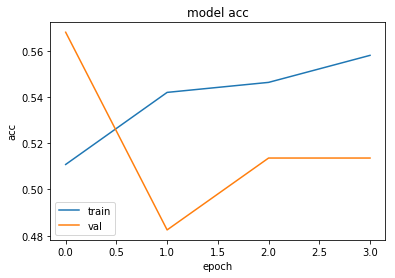

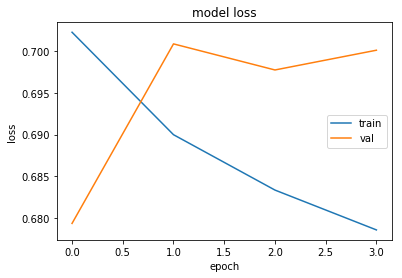

(None, None)

In [50]:
plot_train_val(ann, 'acc'), plot_train_val(ann, 'loss')

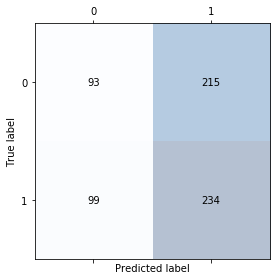

In [51]:
y_pred_test_classifier =  classifier.predict_classes(X_test_tweet, batch_size=20, verbose=0)
confmat = confusion_matrix(np.argmax(y_test_tweet,axis=1), y_pred_test_classifier)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# A RNN

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, SpatialDropout1D, SimpleRNN
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, RNN
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import pandas as pd
import numpy as np
np.random.seed(0)
from nltk import word_tokenize
from gensim.models import word2vec

In [53]:
max_fatures = 3000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_2['tweet'].values)
X = tokenizer.texts_to_sequences(df_2['tweet'].values)
X = pad_sequences(X)

In [54]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 128)           384000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 394       
Total params: 639,194
Trainable params: 639,194
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
y = pd.get_dummies(df['signal_y']).values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2564, 28) (2564, 2)
(641, 28) (641, 2)


In [56]:
model.fit(X_train_2, y_train_2, epochs=20, validation_split=0.1, batch_size=42, verbose=2)

Train on 2307 samples, validate on 257 samples
Epoch 1/20
 - 5s - loss: 0.6933 - acc: 0.5117 - val_loss: 0.6961 - val_acc: 0.5019
Epoch 2/20
 - 4s - loss: 0.6679 - acc: 0.6175 - val_loss: 0.7141 - val_acc: 0.5292
Epoch 3/20
 - 3s - loss: 0.5815 - acc: 0.6990 - val_loss: 0.7767 - val_acc: 0.5175
Epoch 4/20
 - 3s - loss: 0.4685 - acc: 0.7726 - val_loss: 0.9140 - val_acc: 0.4630
Epoch 5/20
 - 4s - loss: 0.3584 - acc: 0.8307 - val_loss: 1.0834 - val_acc: 0.4825
Epoch 6/20
 - 5s - loss: 0.2781 - acc: 0.8806 - val_loss: 1.3310 - val_acc: 0.4864
Epoch 7/20
 - 4s - loss: 0.2335 - acc: 0.8884 - val_loss: 1.5042 - val_acc: 0.4514
Epoch 8/20
 - 4s - loss: 0.1986 - acc: 0.9083 - val_loss: 1.6282 - val_acc: 0.4708
Epoch 9/20
 - 3s - loss: 0.1779 - acc: 0.9205 - val_loss: 1.7682 - val_acc: 0.4786
Epoch 10/20
 - 3s - loss: 0.1540 - acc: 0.9326 - val_loss: 2.0391 - val_acc: 0.4747
Epoch 11/20
 - 3s - loss: 0.1434 - acc: 0.9400 - val_loss: 1.9663 - val_acc: 0.4591
Epoch 12/20
 - 3s - loss: 0.1287 - acc

In [57]:
score,acc = model.evaluate(X_test_2, y_test_2, verbose = 2, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 2.29
acc: 0.51


In [58]:
plot_train_val(model, 'acc'), plot_train_val(model, 'loss')

TypeError: 'History' object is not subscriptable

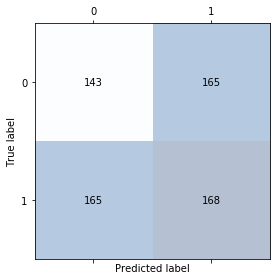

In [59]:
y_pred_test_model =  model.predict_classes(X_test_2, batch_size=20, verbose=0)
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test_model)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Next NN

In [60]:
# delete kernel_initializer
model2 = Sequential()
model2.add(Dense(20, input_dim=803, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(2, activation='softmax'))
adam2 = optimizers.Adam(lr=.05, decay=0.0005)
model2.compile(loss='binary_crossentropy', optimizer=adam2, metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                16080     
_________________________________________________________________
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
__________

In [86]:
X_train

array([[ 3.75793919e-01, -1.77454677e+00,  0.00000000e+00, ...,
         4.94559878e-04,  5.32328272e-04, -2.12158806e-04],
       [-2.01302453e+00, -2.16389510e-01,  0.00000000e+00, ...,
         1.92538368e-02,  9.05187287e-03,  7.82657489e-03],
       [-2.41116094e+00,  3.77194210e-01,  0.00000000e+00, ...,
         1.27178124e-02,  4.41299629e-03,  1.39968074e-02],
       ...,
       [-2.29740768e+00,  9.70777930e-01,  3.18750000e-01, ...,
        -1.17874800e-03,  1.87006026e-02, -1.64434519e-02],
       [ 3.75793919e-01,  4.51392175e-01,  0.00000000e+00, ...,
        -2.61378840e-03,  3.95667890e-03,  1.16051891e-02],
       [ 3.75793919e-01,  5.56696952e-02, -6.25000000e-02, ...,
        -2.63154701e-02,  6.95727437e-04,  1.16607184e-02]])

In [62]:
m2 = model2.fit(X_train, y_train, epochs=7, validation_split=.1, batch_size=20, verbose=1)




Train on 2307 samples, validate on 257 samples
Epoch 1/7
2307/2307 [==============================] - 1s 478us/step - loss: 0.7105 - acc: 0.5117 - val_loss: 0.7063 - val_acc: 0.4436
Epoch 2/7
2307/2307 [==============================] - 0s 108us/step - loss: 0.7056 - acc: 0.5108 - val_loss: 0.6998 - val_acc: 0.4358
Epoch 3/7
2307/2307 [==============================] - 0s 109us/step - loss: 0.7103 - acc: 0.5017 - val_loss: 0.6907 - val_acc: 0.5720
Epoch 4/7
2307/2307 [==============================] - 0s 98us/step - loss: 0.7168 - acc: 0.4939 - val_loss: 0.7231 - val_acc: 0.4319
Epoch 5/7
2307/2307 [==============================] - 0s 104us/step - loss: 0.7045 - acc: 0.5104 - val_loss: 0.6840 - val_acc: 0.5681
Epoch 6/7
2307/2307 [==============================] - 0s 98us/step - loss: 0.7080 - acc: 0.5026 - val_loss: 0.6824 - val_acc: 0.5681
Epoch 7/7
2307/2307 [==============================] - 0s 101us/step - loss: 0.7075 - acc: 0.4948 - val_loss: 0.6830 - val_acc: 0.5681


In [63]:
# score for the test data no tweet model: 0.6923892
# acc for the test data  no tweet model: 0.5195008
# score for the training data no tweet model: 0.6919532
# acc for the training data no tweet model: 0.5247660

In [64]:
model_2_score_no_tweet, model_2_acc_no_tweet = model2.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.7f" % (model_2_score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (model_2_acc_no_tweet))

model_2_score_train_no_tweet, model_2_acc_train_no_tweet = model2.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.7f" % (model_2_score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (model_2_acc_train_no_tweet))

score for the test data no tweet model: 0.7006841
acc for the test data  no tweet model: 0.5117005
score for the training data no tweet model: 0.6984203
acc for the training data no tweet model: 0.5193058


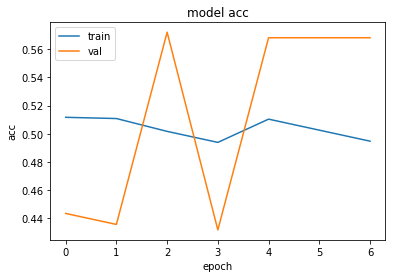

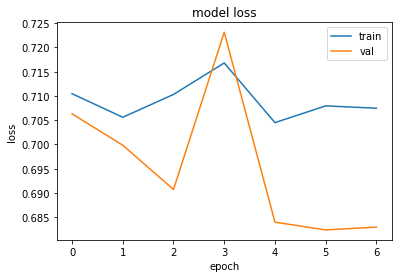

(None, None)

In [65]:
plot_train_val(m2, 'acc'), plot_train_val(m2, 'loss')

In [66]:
y_pred_test_model2 =  model2.predict_classes(X_test, batch_size=20, verbose=0)

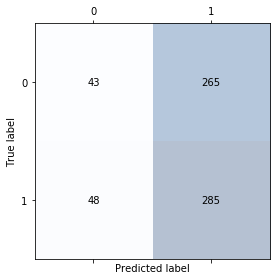

In [67]:
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test_model2)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Another NN

In [68]:
# classifier2 = Sequential()
# randuni = initializers.VarianceScaling(scale=.375, distribution='normal', seed=None) # RandomUniform(minval=-0.05, maxval=0.05, seed=None)
# classifier2.add(Dense(15, kernel_initializer=randuni, activation = 'tanh'))
# classifier2.add(Dense(20, activation = 'tanh'))
# # classifier2.add(Dense(15, activation = 'tanh'))
# # classifier2.add(Dense(50, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
# # classifier2.add(Dense(10, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
# classifier.add(Dense(5, kernel_regularizer=regularizers.l1(0.05), activation='relu'))
# classifier.add(Dense(5, activation = 'tanh'))
# classifier.add(Dense(5, activation = 'tanh'))
# classifier2.add(Dense(2, activation = 'softmax'))
# adam = optimizers.Adam(lr=.0001)
# classifier2.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [69]:
classifier2 = Sequential()
randuni = initializers.VarianceScaling(scale=.375, distribution='normal', seed=None) # RandomUniform(minval=-0.05, maxval=0.05, seed=None)
classifier2.add(Dense(15, kernel_initializer=randuni, activation = 'tanh'))
classifier2.add(Dense(15, activation = 'tanh'))
classifier2.add(Dense(10, activation = 'tanh'))
# classifier2.add(Dense(50, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
# classifier2.add(Dense(10, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
classifier2.add(Dense(5, kernel_regularizer=regularizers.l1(0.05), activation='relu'))
classifier2.add(Dense(5, activation = 'tanh'))
# classifier.add(Dense(5, activation = 'tanh'))
classifier2.add(Dense(2, activation = 'softmax'))
adam = optimizers.Adam(lr=.0001)
classifier2.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [70]:
# print(classifier2.summary())

In [71]:
c2 = classifier2.fit(X_train, y_train, epochs=15, validation_split=.1, batch_size=200, verbose=1)


Train on 2307 samples, validate on 257 samples
Epoch 1/15
2307/2307 [==============================] - 1s 261us/step - loss: 0.6927 - acc: 0.5091 - val_loss: 0.6926 - val_acc: 0.5564
Epoch 2/15
2307/2307 [==============================] - 0s 13us/step - loss: 0.6922 - acc: 0.5290 - val_loss: 0.6919 - val_acc: 0.5370
Epoch 3/15
2307/2307 [==============================] - 0s 20us/step - loss: 0.6917 - acc: 0.5381 - val_loss: 0.6915 - val_acc: 0.5214
Epoch 4/15
2307/2307 [==============================] - 0s 20us/step - loss: 0.6913 - acc: 0.5377 - val_loss: 0.6910 - val_acc: 0.5370
Epoch 5/15
2307/2307 [==============================] - 0s 21us/step - loss: 0.6908 - acc: 0.5433 - val_loss: 0.6906 - val_acc: 0.5253
Epoch 6/15
2307/2307 [==============================] - 0s 17us/step - loss: 0.6904 - acc: 0.5399 - val_loss: 0.6902 - val_acc: 0.5136
Epoch 7/15
2307/2307 [==============================] - 0s 17us/step - loss: 0.6899 - acc: 0.5399 - val_loss: 0.6898 - val_acc: 0.5253
Epoch 8

In [72]:
classifier2_score_no_tweet, classifier2_acc_no_tweet = classifier2.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.7f" % (classifier2_score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (classifier2_acc_no_tweet))

classifier2_score_train_no_tweet, classifier2_acc_train_no_tweet = classifier2.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.7f" % (classifier2_score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (classifier2_acc_train_no_tweet))

score for the test data no tweet model: 0.6928081
acc for the test data  no tweet model: 0.5039002
score for the training data no tweet model: 0.6848510
acc for the training data no tweet model: 0.5520671


In [73]:
# score for the test data no tweet model: 0.692
# acc for the test data  no tweet model: 0.5195008
# score for the training data no tweet model: 0.692
# acc for the training data no tweet model: 0.5247660

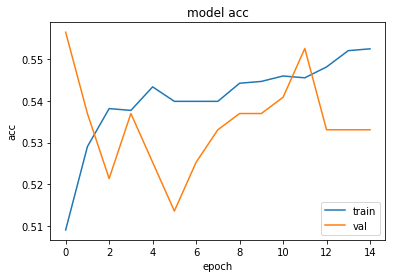

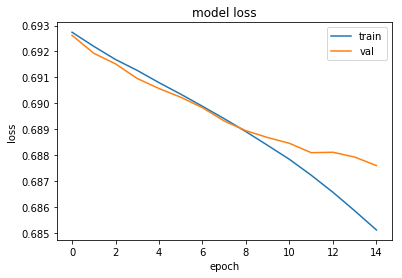

(None, None)

In [74]:
plot_train_val(c2, 'acc'), plot_train_val(c2, 'loss')

In [75]:
y_pred_test =  classifier2.predict_classes(X_test, batch_size=20, verbose=0)

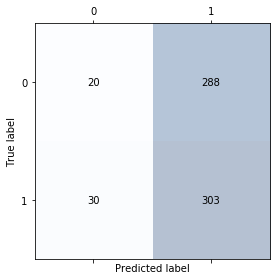

In [76]:
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()


# Possible Tuning

In [77]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=803, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20, verbose=0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

param_grid = dict(learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.527496 using {'learn_rate': 0.001, 'momentum': 0.6}
0.509555 (0.016009) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.519306 (0.012838) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.514236 (0.011006) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.527496 (0.021977) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.513846 (0.004343) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.522036 (0.003883) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.523206 (0.013410) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.505655 (0.013175) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.523206 (0.019027) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.516966 (0.008646) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.496295 (0.017255) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.505265 (0.011590) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.507215 (0.012271) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.510725 (0.004069) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.509555 (0.014968) with: {'learn_rate':

In [78]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=803, kernel_initializer='uniform', activation='tanh', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
#     model.add(Dense(neurons, kernel_initializer='uniform', activation='tanh', kernel_constraint=maxnorm(4)))
#     model.add(Dropout(0.1))    
    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
# Compile model
    adam = optimizers.Adam(lr=.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# split into input (X) and output (Y) variables


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [2, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.506825 using {'neurons': 2}
0.506825 (0.015448) with: {'neurons': 2}
0.500975 (0.011525) with: {'neurons': 5}
0.506435 (0.005984) with: {'neurons': 10}
0.500195 (0.012871) with: {'neurons': 15}
0.504095 (0.018953) with: {'neurons': 20}
0.504095 (0.012186) with: {'neurons': 25}
0.499025 (0.016688) with: {'neurons': 30}


### Only polarity model

In [132]:
len(X_pol)

3

In [125]:
s1 = df_2.polarity.values
s2 = df_2.retweet_from.values
s3 = df_2.tweet_length.values
X_pol = pd.DataFrame([s1,s2,s3]).as_matrix()

In [133]:
X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol.T, y, test_size = 0.20, random_state = 42)

In [136]:
classifier3 = Sequential()
# randuni = initializers.VarianceScaling(scale=.3, distribution='normal', seed=None) # RandomUniform(minval=-0.05, maxval=0.05, seed=None)
classifier3.add(Dense(5, input_dim=3, kernel_initializer='normal', activation = 'tanh'))
# classifier3.add(Dense(15, activation = 'tanh'))
# classifier3.add(Dense(5, activation = 'tanh'))
# classifier2.add(Dense(50, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
# classifier2.add(Dense(10, kernel_regularizer=regularizers.l1(0.05), activation='tanh'))
# classifier3.add(Dense(5, kernel_regularizer=regularizers.l1(0.05), activation='relu'))
# classifier3.add(Dense(5, activation = 'tanh'))
# classifier.add(Dense(5, activation = 'tanh'))
classifier3.add(Dense(2, activation = 'softmax'))
adam = optimizers.Adam(lr=.001)
classifier3.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [137]:
c3 = classifier3.fit(X_train_pol, y_train, epochs=15, validation_split=.1,
                     batch_size=20, verbose=1)

Train on 2307 samples, validate on 257 samples
Epoch 1/15
2307/2307 [==============================] - 1s 461us/step - loss: 0.6946 - acc: 0.4840 - val_loss: 0.6883 - val_acc: 0.5992
Epoch 2/15
2307/2307 [==============================] - 0s 79us/step - loss: 0.6926 - acc: 0.5130 - val_loss: 0.6885 - val_acc: 0.5992
Epoch 3/15
2307/2307 [==============================] - 0s 73us/step - loss: 0.6926 - acc: 0.5074 - val_loss: 0.6907 - val_acc: 0.5292
Epoch 4/15
2307/2307 [==============================] - 0s 71us/step - loss: 0.6927 - acc: 0.4991 - val_loss: 0.6897 - val_acc: 0.5370
Epoch 5/15
2307/2307 [==============================] - 0s 65us/step - loss: 0.6926 - acc: 0.5117 - val_loss: 0.6923 - val_acc: 0.5331
Epoch 6/15
2307/2307 [==============================] - 0s 66us/step - loss: 0.6925 - acc: 0.5113 - val_loss: 0.6901 - val_acc: 0.5447
Epoch 7/15
2307/2307 [==============================] - 0s 61us/step - loss: 0.6926 - acc: 0.5139 - val_loss: 0.6900 - val_acc: 0.5409
Epoch 8

In [138]:
classifier3_score_no_tweet, classifier3_acc_no_tweet = classifier3.evaluate(X_test_pol, y_test, verbose = 2, batch_size = 32)
print("score for the test data polarity model: %.7f" % (classifier3_score_no_tweet))
print("acc for the test data polarity model: %.7f" % (classifier3_acc_no_tweet))

classifier3_score_train_no_tweet, classifier3_acc_train_no_tweet = classifier3.evaluate(X_train_pol, y_train, verbose = 2, batch_size = 32)
print("score for the training data polarity model: %.7f" % (classifier3_score_train_no_tweet))
print("acc for the training data polarity model: %.7f" % (classifier3_acc_train_no_tweet))

score for the test data polarity model: 0.6923573
acc for the test data polarity model: 0.5304212
score for the training data polarity model: 0.6919562
acc for the training data polarity model: 0.5177457


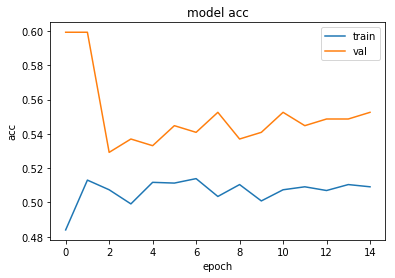

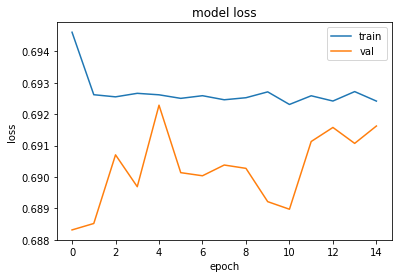

(None, None)

In [139]:
plot_train_val(c3, 'acc'), plot_train_val(c3, 'loss')

In [140]:
y_pred_test3 =  classifier3.predict_classes(X_test_pol, batch_size=20, verbose=0)

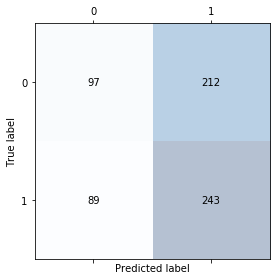

In [141]:
confmat = confusion_matrix(np.argmax(y_test, axis=1), y_pred_test3)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [127]:
# X_pol

In [128]:
# df_2.head()